##Цель эксперимента
Изучить пользовательское поведение до эксперимента: вывести с помощью графиков ключевые метрики пользователей (средний чек корзины, частота кликов, конверсия в добавления)

In [4]:
# Ячейка 1: Импорт библиотек и загрузка данных
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.stats.power import NormalIndPower

# Загрузка и безопасное преобразование даты
df = pd.read_csv('/content/final_results_to_analyze2.csv')

# Преобразуем дату, пропуская ошибки
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Удалим строки, где дата не распознана
df = df.dropna(subset=['date'])



## 1. Расчет метрик

In [5]:
# Ячейка 2: Расчет метрик по пользователям
df['avg_order_value'] = df['sum_orders_ads'] / df['cnt_orders_ads']
df['avg_order_value'].replace([float('inf'), float('nan')], 0, inplace=True)
df['click_freq'] = df['cnt_view_ads']
df['add_conversion'] = df['is_adds_ads']


/tmp/ipython-input-5-3120983404.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['avg_order_value'].replace([float('inf'), float('nan')], 0, inplace=True)


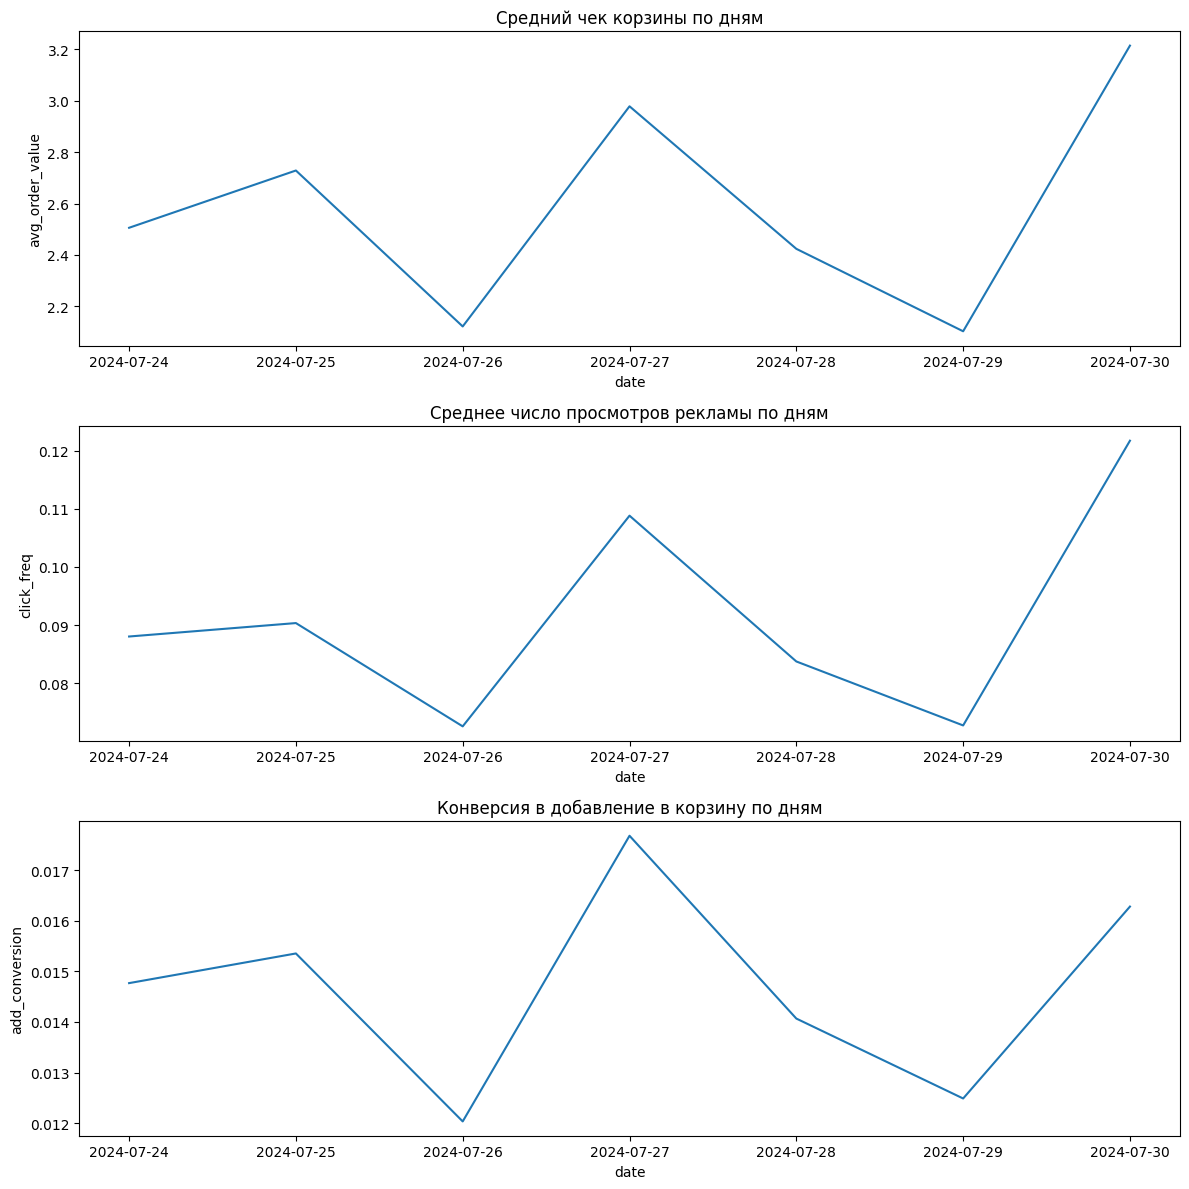

In [6]:
# Ячейка 3: Группировка по дате и построение графиков
daily_metrics = df.groupby('date').agg({
    'avg_order_value': 'mean',
    'click_freq': 'mean',
    'add_conversion': 'mean'
}).reset_index()

fig, axs = plt.subplots(3, 1, figsize=(12, 12))

sns.lineplot(data=daily_metrics, x='date', y='avg_order_value', ax=axs[0])
axs[0].set_title('Средний чек корзины по дням')

sns.lineplot(data=daily_metrics, x='date', y='click_freq', ax=axs[1])
axs[1].set_title('Среднее число просмотров рекламы по дням')

sns.lineplot(data=daily_metrics, x='date', y='add_conversion', ax=axs[2])
axs[2].set_title('Конверсия в добавление в корзину по дням')

plt.tight_layout()
plt.show()


In [7]:
# Ячейка 4: Функция для расчета размера выборки по MDE
def calculate_sample_size(mde, alpha=0.05, power=0.8, baseline_rate=0.02):
    analysis = NormalIndPower()
    sd = np.sqrt(2 * baseline_rate * (1 - baseline_rate))
    effect_size = mde / sd
    sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1.0)
    return int(np.ceil(sample_size))


In [8]:
# Ячейка 5: Таблица MDE и размера выборки
baseline_rate = df['is_orders_ads'].mean()
mde_values = np.arange(0.002, 0.021, 0.002)
sample_sizes = [calculate_sample_size(mde, baseline_rate=baseline_rate) for mde in mde_values]

mde_table = pd.DataFrame({
    'MDE': mde_values,
    'Required Sample Size per Group': sample_sizes
})
mde_table


,MDE,Required Sample Size per Group
0,0.002,96738
1,0.004,24185
2,0.006,10749
3,0.008,6047
4,0.010,3870
5,0.012,2688
6,0.014,1975
7,0.016,1512
8,0.018,1195
9,0.020,968
